# Chapter 2, Part 1. Identification of Asteroid Families’ Members
Additional material to chapter 2 in eds. R.C.Domingos, M.Huaman, M.Lourenço, **Machine Learning for Small Bodies in the Solar System, Elsevier 2024.**

**.¹R.C. Domingos, .²M. Huaman, .³M. Lourenço**

**.¹**organization=São Paulo State University (UNESP), School of Engineering, Electronic
and Telecommunications Engineering,addressline=505, Av. Profa. Isette Correa Fontão,
city=São João da Boa Vista, postcode=13876-750, state=SP, country=Brazil

**.²**organization=Universidad tecnológica del Perú (UTP), city=Cercado de Lima,
postcode=15046, country=Perú

**.³**organization=São Paulo State University (UNESP), School of Engineering and
Sciences, Department of Matematics,addressline=333, Av. Dr. Ariberto Pereira da
Cunha, city=Guaratinguetá, postcode=12516-410, state=SP, country=Brazil



## Installation

```bash
pip install numpy
pip install pandas
pip install install matplotlib
pip install scikit-learn
```

* This program was run on the Anaconda distribution using a Python kernel.
* Additionally, we must load input files for the family and the region where the family is located.
* Input files as "family_test" is saved as fam_data.
* Input files as "back_test" is saved as back_data.

## **2.1. Machine learning algorithms for the classification**
The main idea is to take a data set of asteroids that have previously been classified into families and use the k closest asteroids to determine whether an asteroid not in the set is a member of the family or not and check which is the predominant family of the neighboring asteroids. 

## **2.1.1. Stand-alone method: KNN algorithm**
Packages/modules required to run the program:
* !pip install numpy
* !pip install pandas
* !pip install install matplotlib
* !pip install scikit-learn

**We use "import" to load the libraries we will need.**

* Numpy, package is used to do scientific calculations. 
* Pandas, on the other hand contains tools that help in data analysis.
* Matplotlib, used for generating simple and powerful graphic visualizations.
* Scikit-learn, module for machine learning built on top of SciPy.
  
This program was run on the Anaconda distribution using a Python kernel.

In [3]:
# Packages required to run the program
#!pip install numpy
#!pip install pandas
#!pip install install matplotlib
#!pip install scikit-learn

# Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import GridSearchCV 
from sklearn.model_selection import GridSearchCV
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE


**Setup the hyperparameter grid**
Using the GridSearchCV approach from the **scikit-learn package**

In [4]:
n_neighbors = np.arange(1,50,1)
param_grid = {'n_neighbors':  n_neighbors}

**Reading input files with asteroid family data**
Opening the input files as "family_test" is saved as fam_data. 

In [5]:
fam_data=pd.read_csv("family_test", delimiter=" ")    # Read the family data
X0=fam_data.iloc[:,4].values
X_train=X0[:, np.newaxis]
y_train=fam_data.iloc[:,5].values
print(np.shape(X_train),np.shape(y_train))            # number of tests

(3311, 1) (3311,)


**Reading input files as back_test with asteroid data**
The input files "back_test" as back_data for reading asteroids in the family region.

In [6]:
back_data=pd.read_csv("back_test", delimiter=" ")
X1=back_data.iloc[:,4].values
X_test=X1[:,np.newaxis]
y_test=back_data.iloc[:,5].values
print(np.shape(X_test))

(148036, 1)


**Tuning hyperparameters in Python with GridSearchCV**
A kNN classifier model is created, by default from the **sklearn.neighbors library.**

In [7]:
knn = KNeighborsClassifier()
# Instantiate the GridSearchCV object: dt_grid
dt_grid=GridSearchCV(knn, param_grid, cv=4)

# Fit the classifier to the training data
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [8]:
# Print the tuned parameters and score
print("Tuned KNN parameter: {}".format(dt_grid.best_params_)) 
print("Best score is {}".format(dt_grid.best_score_))

Tuned KNN parameter: {'n_neighbors': 2}
Best score is 0.9996980676328502


**A kNN classifier model is created with 2 neighbors**

In [9]:
knn = KNeighborsClassifier(n_neighbors=2)
# Fit the classifier for the training knn with data X_train and y_train
knn.fit(X_train,y_train)
# Predict the labels of the test set: y_pred
y_pred = knn.predict(X_test)

**We print the best parameter and the best score.**

In [10]:
# Print the accuracy
print('Accuracy:', knn.score(X_test, y_test))
print('Predict the labels:', np.mean(y_pred))
np.savetxt('results_KNN.dat',y_pred, fmt="%f")

Accuracy: 0.9726823205166311
Predict the labels: 0.027317679483368912


**We plot the data.frame that we are analyzing.**

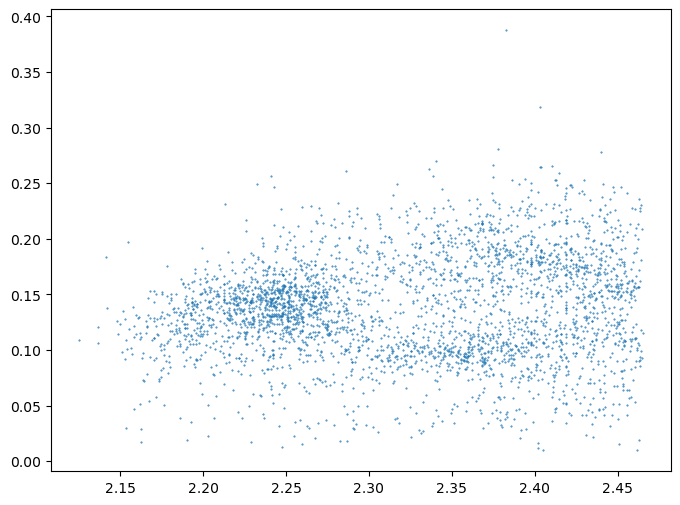

In [11]:
cmap = np.array(["blue", "green", "orange"])
plt.figure(figsize=(8, 6))
plt.scatter(fam_data.iloc[:,1].values, fam_data.iloc[:,2].values, s=0.2)
plt.show()

## **2.1.2. Stand-alone method: Decision tree algorithm**</span>

A decision tree is an essential machine learning technique representing decisions as a tree with leaf nodes denoting outcomes and branches representing decision rules.
The data set features to be classed are considered when making decisions. Let’s say a set of data needs to be classified. The method asks a question about the data at the first level of the tree, and it proceeds to the next node by following the branch. After that, the tree is split into smaller trees until it reaches the leaf node, the last node.

Packages/modules required to run the program:

* !pip install numpy
* !pip install pandas
* !pip install install matplotlib
* !pip install scikit-learn

**We use "import" to load the libraries we will need.**

* Numpy, package is used to do scientific calculations. 
* Pandas, on the other hand contains tools that help in data analysis.
* Matplotlib, used for generating simple and powerful graphic visualizations.
* Scikit-learn, module for machine learning built on top of SciPy.
  
This program was run on the Anaconda distribution using a Python kernel.

In [12]:
# Packages required to run the program
#!pip install numpy
#!pip install pandas
#!pip install install matplotlib
#!pip install scikit-learn

# Import the necessary modules
import pandas as pd
import numpy as np
#from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score             #from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE    # Import mean_squared_error as MSE

**Setup the hyperparameter grid**
Using the GridSearchCV approach from the **scikit-learn package**

In [13]:
# Setup the hyperparameter grid
#max_depth_space = np.arange(1,15,1)
max_depth_space = np.arange(1,50,1)
param_grid = {'max_depth':  max_depth_space}


**Reading input files with asteroid family data**
Opening the input files as "family_test" is saved as fam_data. 

In [14]:
# Read the family data
fam_data=pd.read_csv("family_test", delimiter=" ")
X0=fam_data.iloc[:,4].values
X_train=X0[:, np.newaxis]
y_train=fam_data.iloc[:,5].values
print(np.shape(X_train),np.shape(y_train))
#print(X_train.max())  #print(y_train)

(3311, 1) (3311,)


**Reading input files as back_test with asteroid data**
The input files "back_test" as back_data for reading asteroids in the family region.

In [15]:
# Read the background data
back_data=pd.read_csv("back_test", delimiter=" ")
X1=back_data.iloc[:,4].values
X_test=X1[:,np.newaxis]
y_test=back_data.iloc[:,5].values
print(np.shape(X_test))

(148036, 1)


**Tuning hyperparameters in Python with GridSearchCV**
A DecisionTree classifier model is created, by default from the **sklearn.tree library**.

In [16]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Instantiate the GridSearchCV object: dt_grid
dt_grid=GridSearchCV(dt_entropy, param_grid, cv=4)

# Fit the classifier to the training data
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [17]:
# Print the tuned parameters and score
print("Tuned Decision Tree parameter: {}".format(dt_grid.best_params_)) 
print("Best score is {}".format(dt_grid.best_score_))

Tuned Decision Tree parameter: {'max_depth': 1}
Best score is 0.9993961352657005


**Best parameter fit and score for decision tree model**

In [18]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=1)
# Fit the classifier to the training data
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)

In [19]:
# Predict the labels of the test set: y_pred
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

**We print the accuracy achieved by using entropy and label prediction**

In [20]:
# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

print('Predict the labels: ',np.mean(y_pred))
np.savetxt('results_DEC.dat',y_pred, fmt="%f")

Accuracy achieved by using entropy:  0.962306465994758
Predict the labels:  0.03769353400524197


## **2.1.3. Ensemble methods: Random Forest algorithms**</span>

Random forest is made up of numerous individual decision Tree, which functions as a classifier for Bagging. A distinct bootstrap sample of the same size as the training set is used to train each estimator. 
Every tree within the Random forest generates a class prediction; our model predicts the class that receives the greatest number of votes. 
The number of estimators utilized in the approach is a free model parameter. 

Packages/modules required to run the program:
* !pip install numpy
* !pip install pandas
* !pip install install matplotlib
* !pip install scikit-learn

**We use "import" to load the libraries we will need.**

* Numpy, package is used to do scientific calculations. 
* Pandas, on the other hand contains tools that help in data analysis.
* Matplotlib, used for generating simple and powerful graphic visualizations.
* Scikit-learn, module for machine learning built on top of SciPy.
  
This program was run on the Anaconda distribution using a Python kernel.

In [21]:
# Packages required to run the program
#!pip install numpy
#!pip install pandas
#!pip install install matplotlib
#!pip install scikit-learn

# Import the necessary modules
import pandas as pd
import numpy as np
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

**Setup the hyperparameter grid**
Using the GridSearchCV approach from the **scikit-learn package**

In [22]:
# Setup the hyperparameter grid
n_est = np.arange(15,50,1)
#n_est = np.arange(1,50,1)
param_grid = {'n_estimators':  n_est}

**Reading input files with asteroid family data**
Opening the input files as "family_test" is saved as fam_data. 

In [23]:
# Read the family data
fam_data=pd.read_csv("family_test", delimiter=" ")
X0=fam_data.iloc[:,4].values
X_train=X0[:, np.newaxis]
y_train=fam_data.iloc[:,5].values
print(np.shape(X_train),np.shape(y_train))
#X_train

(3311, 1) (3311,)


**Reading input files as back_test with asteroid data**
The input files "back_test" as back_data for reading asteroids in the family region.

In [24]:
# Read the background data
back_data=pd.read_csv("back_test", delimiter=" ")
X1=back_data.iloc[:,4].values
X_test=X1[:,np.newaxis]
y_test=back_data.iloc[:,5].values
print(np.shape(X_test))
#y_test

(148036, 1)


**Tuning hyperparameters in Python with GridSearchCV**
A Random Forest Regressor model is created, by default from the **sklearn.ensemble library**. 

In [25]:
# Instantiate rf
rf = RandomForestRegressor(random_state=2)

# Instantiate the GridSearchCV object: dt_grid
dt_grid=GridSearchCV(rf, param_grid, cv=5)

# Fit the classifier to the training data
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2),
             param_grid={'n_estimators': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49])})

**Best parameter fit and score for Random Forest model**

In [26]:
# Print the tuned parameters and score
print("Tuned Decision Tree parameter: {}".format(dt_grid.best_params_)) 
print("Best score is {}".format(dt_grid.best_score_))

Tuned Decision Tree parameter: {'n_estimators': 22}
Best score is 0.849232704640235


In [27]:
# Instantiate rf
rf = RandomForestRegressor(n_estimators=22,random_state=2)

# Fit the classifier to the training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=22, random_state=2)

In [28]:
# Predict the labels of the test set: y_pred
y_pred = rf.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

**We print the best parameter and the best score.**

In [29]:
# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
print(np.mean(y_pred))
np.savetxt('results_RAND.dat',y_pred, fmt="%f")

Test set RMSE of rf: 0.17
0.0343549726233668


## **2.1.4. Ensemble methods: Extremely Randomized Trees (ExtraTree)**

ExtraTree randomly creates many decision trees to make the bagging process extremely random and then, by combining the results of each tree, finds the final answer. 
This allows the model’s variance to be further reduced but at the expense of increased bias. The number of estimators in this approach is the hyper-parameter, much like in other bagging ensemble algorithms.

Packages/modules required to run the program:
* !pip install numpy
* !pip install pandas
* !pip install install matplotlib
* !pip install scikit-learn

**We use "import" to load the libraries we will need.**

* Numpy, package is used to do scientific calculations. 
* Pandas, on the other hand contains tools that help in data analysis.
* Matplotlib, used for generating simple and powerful graphic visualizations.
* Scikit-learn, module for machine learning built on top of SciPy.
  
This program was run on the Anaconda distribution using a Python kernel.

In [30]:
# Packages required to run the program
#!pip install numpy
#!pip install pandas
#!pip install install matplotlib
#!pip install scikit-learn

# Import the necessary modules
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE  # Import mean_squared_error as MSE

**Setup the hyperparameter grid**
Using the GridSearchCV approach from the **scikit-learn package**

In [31]:
# Setup the hyperparameter grid
n_est = np.arange(1,150,1)
param_grid = {'n_estimators':  n_est}

**Reading input files with asteroid family data**
Opening the input files as "family_test" is saved as fam_data.

In [32]:
# Read the family data
fam_data=pd.read_csv("family_test", delimiter=" ")
X0=fam_data.iloc[:,4].values
X_train=X0[:, np.newaxis]
y_train=fam_data.iloc[:,5].values
print('Data family: ',np.shape(X_train),np.shape(y_train))

Data family:  (3311, 1) (3311,)


**Reading input files as back_test with asteroid data**
The input files "back_test" as back_data for reading asteroids in the family region.

In [33]:
# Read the background data
back_data=pd.read_csv("back_test", delimiter=" ")
X1=back_data.iloc[:,4].values
X_test=X1[:,np.newaxis]
y_test=back_data.iloc[:,5].values
print('Data family: ',np.shape(X_test))

Data family:  (148036, 1)


**Tuning hyperparameters in Python with GridSearchCV**
A Extra Treesclassifier model is created, by default from the  **sklearn.ensemble library**.  

In [34]:
# Instantiate ExtraTreeClassifier
clf_ET = ExtraTreesClassifier(random_state=2)

# Instantiate the GridSearchCV object: dt_grid
dt_grid=GridSearchCV(clf_ET, param_grid, cv=4)

# Fit the classifier to the training data
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=ExtraTreesClassifier(random_state=2),
             param_grid={'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149])})

**Best parameter fit and score for decision tree model**

In [35]:
# Print the tuned parameters and score
print("Tuned Decision Tree parameter: {}".format(dt_grid.best_params_)) 
print("Best score is {}".format(dt_grid.best_score_))

Tuned Decision Tree parameter: {'n_estimators': 1}
Best score is 0.9993961352657005


In [36]:
# Instantiate ExtraTreeClassifier
#clf_ET = ExtraTreesClassifier(n_estimators=60,random_state=2)
clf_ET = ExtraTreesClassifier(n_estimators=1,random_state=2)
# Fit the classifier to the training data
clf_ET.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=1, random_state=2)

In [37]:
# Predict the labels of the test set: y_pred
y_pred = clf_ET.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

**We print the best parameter predict of the labels.**

In [38]:
# Print rmse_test
print('Test set RMSE of clf_ET : {:.2f}'.format(rmse_test))

print('Predict the labels clf_ET.predict: ', np.mean(y_pred))
np.savetxt('results_trees.dat',y_pred, fmt="%f")

Test set RMSE of clf_ET : 0.19
Predict the labels clf_ET.predict:  0.037369288551433434
